<a href="https://colab.research.google.com/github/Vaishu03/ML/blob/main/Bank_Churn_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

## Import the dataset

In [5]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

## Data Analysis

In [6]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [8]:
df.duplicated('CustomerId').sum()

0

In [9]:
df = df.set_index('CustomerId')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


## Encoding

In [11]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

In [13]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [14]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [15]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [16]:
df.replace({'Num Of Products':{1:0,2:1,3:1,4:1}},inplace=True)

In [17]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [19]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [20]:
df.loc[(df['Balance']==0,'Churn')].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [21]:
df['Zero Balance'] = np.where(df['Balance']>0,1,0)

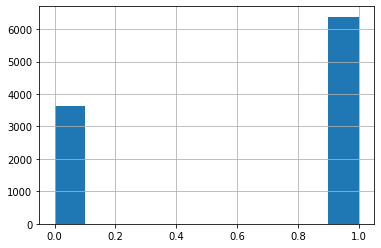

In [22]:
df['Zero Balance'].hist()

In [23]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

## Define Label and Features

In [24]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [25]:
X = df.drop(['Surname','Churn'],axis=1)

In [26]:
y = df['Churn']

In [27]:
X.shape,y.shape

((10000, 11), (10000,))

In [28]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

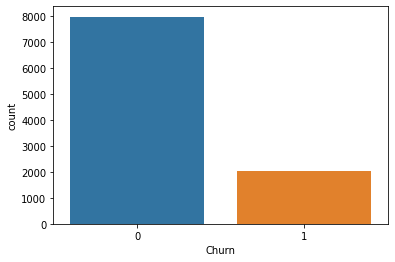

In [29]:
sns.countplot(x='Churn',data=df)

In [30]:
X.shape,y.shape

((10000, 11), (10000,))

## Random UnderSampling

In [31]:
from imblearn.under_sampling import RandomUnderSampler

In [32]:
rus = RandomUnderSampler(random_state=10)

In [33]:
X_rus,y_rus = rus.fit_resample(X,y)

In [34]:
X_rus.shape,y_rus.shape,X.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [35]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [36]:
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

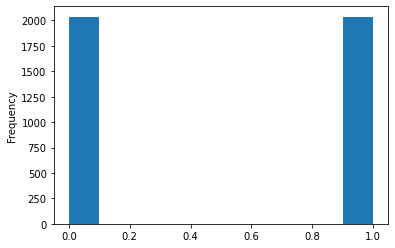

In [37]:
y_rus.plot(kind='hist')

## Random Over Sampling

In [38]:
from imblearn.over_sampling import RandomOverSampler

In [39]:
ros = RandomOverSampler(random_state=10)

In [40]:
X_ros,y_ros = ros.fit_resample(X,y)

In [41]:
X_ros.shape,y_ros.shape,X.shape,y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [42]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [43]:
y_ros.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

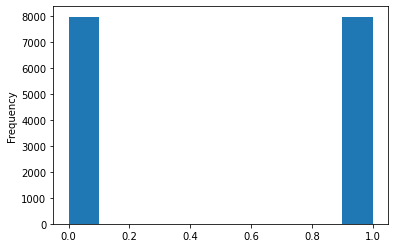

In [44]:
y_ros.plot(kind='hist')

## Train Test Split

In [45]:
from sklearn.model_selection import train_test_split

## Split Original Data

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

## Split Random Under Sample Data

In [47]:
X_train_rus,X_test_rus,y_train_rus,y_test_rus = train_test_split(X_rus,y_rus,test_size=0.3,random_state=10)

## Split Random Over Sample Data

In [48]:
X_train_ros,X_test_ros,y_train_ros,y_test_ros = train_test_split(X_ros,y_ros,test_size=0.3,random_state=10)

## Standardize Features

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
ss = StandardScaler()

## Standardize Original Data

In [51]:
X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = ss.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [52]:
X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = ss.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

## Standardize Random Under Sample Data

In [53]:
X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = ss.fit_transform(X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [54]:
X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = ss.fit_transform(X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

## Standardize Random Over Sample Data

In [55]:
X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = ss.fit_transform(X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [56]:
X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = ss.fit_transform(X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

## Support Vector Machine Classifier

In [57]:
from sklearn.svm import SVC

In [58]:
model = SVC()

In [59]:
model.fit(X_train,y_train)

SVC()

In [60]:
y_pred = model.predict(X_test)

## Model Accuracy

In [61]:
from sklearn.metrics import confusion_matrix,classification_report

In [62]:
confusion_matrix(y_test,y_pred)

array([[2328,   52],
       [ 452,  168]])

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      2380
           1       0.76      0.27      0.40       620

    accuracy                           0.83      3000
   macro avg       0.80      0.62      0.65      3000
weighted avg       0.82      0.83      0.80      3000



## Hyper Parameter Tuning

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
param_grid = {'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight':['balanced']}

In [66]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [67]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [68]:
grid_predictions = grid.predict(X_test)

In [69]:
confusion_matrix(y_test,grid_predictions)

array([[2129,  251],
       [ 392,  228]])

In [70]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      2380
           1       0.48      0.37      0.41       620

    accuracy                           0.79      3000
   macro avg       0.66      0.63      0.64      3000
weighted avg       0.77      0.79      0.78      3000



## Model with Random Under Sample

In [71]:
model_rus = SVC()

In [72]:
model_rus.fit(X_train_rus,y_train_rus)

SVC()

In [73]:
y_pred_rus = model_rus.predict(X_test_rus)

## Model Accuracy

In [74]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[465, 157],
       [171, 430]])

In [75]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       622
           1       0.73      0.72      0.72       601

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



## Hyper Parameter Tuning

In [76]:
param_grid = {'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight':['balanced']}

In [77]:
grid_rus = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_rus.fit(X_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.6s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [78]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [79]:
grid_rus_predictions = grid_rus.predict(X_test_rus)

In [80]:
confusion_matrix(y_test_rus,grid_rus_predictions)

array([[465, 157],
       [176, 425]])

In [81]:
print(classification_report(y_test_rus,grid_rus_predictions))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       622
           1       0.73      0.71      0.72       601

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



## Model with Random Over Sample Data

In [82]:
model_ros = SVC()

In [83]:
model_ros.fit(X_train_ros,y_train_ros)

SVC()

In [84]:
y_pred_ros = model_ros.predict(X_test_ros)

## Model Accuracy

In [85]:
confusion_matrix(y_test_ros,y_pred_ros)

array([[1823,  572],
       [ 609, 1774]])

In [86]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76      2395
           1       0.76      0.74      0.75      2383

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



## Hyper Parameter Tuning

In [87]:
param_grid = {'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight':['balanced']}

In [88]:
grid_ros = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_ros.fit(X_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   9.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   8.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   7.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   6.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   8.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.9s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [89]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [90]:
grid_ros_predictions = grid_ros.predict(X_test_ros)

In [91]:
confusion_matrix(y_test_ros,grid_ros_predictions)

array([[2047,  348],
       [  85, 2298]])

In [92]:
print(classification_report(y_test_ros,grid_ros_predictions))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2395
           1       0.87      0.96      0.91      2383

    accuracy                           0.91      4778
   macro avg       0.91      0.91      0.91      4778
weighted avg       0.91      0.91      0.91      4778



## Comparision

In [98]:
# without tuning
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      2380
           1       0.76      0.27      0.40       620

    accuracy                           0.83      3000
   macro avg       0.80      0.62      0.65      3000
weighted avg       0.82      0.83      0.80      3000



In [99]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      2380
           1       0.48      0.37      0.41       620

    accuracy                           0.79      3000
   macro avg       0.66      0.63      0.64      3000
weighted avg       0.77      0.79      0.78      3000



In [100]:
# without tuning
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       622
           1       0.73      0.72      0.72       601

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



In [101]:
print(classification_report(y_test_rus,grid_rus_predictions))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       622
           1       0.73      0.71      0.72       601

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



In [102]:
# without tuning
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76      2395
           1       0.76      0.74      0.75      2383

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



In [103]:
print(classification_report(y_test_ros,grid_ros_predictions))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2395
           1       0.87      0.96      0.91      2383

    accuracy                           0.91      4778
   macro avg       0.91      0.91      0.91      4778
weighted avg       0.91      0.91      0.91      4778



**Hence the final approach with random over sampling gives us better results**